<a href="https://colab.research.google.com/github/Ali-Khatib/Comparative-Sentiment-Analysis-Across-varying-datasets/blob/main/imdb_movie_review_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt #data visualization
import seaborn as sb#data visualization
import warnings
import re
from nltk.stem import WordNetLemmatizer #by NLTK for preprocessing of the text
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report, confusion_matrix
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline, logging
import warnings

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ( classification_report, accuracy_score)
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import MultinomialNB


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout, Flatten, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


warnings.filterwarnings('ignore')


from textblob import TextBlob#does a simple sentiment analysis
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

lemmatizer = WordNetLemmatizer()#reduces the words to basic dict.

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2025-12-07 18:00:23.282981: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765130423.465934      38 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765130423.518800      38 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/amazon-customerreviews-polarity/train.csv
/kaggle/input/amazon-customerreviews-polarity/test.csv
/kaggle/input/glove6b100dtxt/glove.6B.100d.txt
/kaggle/input/stanford-sentiment-treebank-v2-sst2/BERT-SST2-Dataset-Paper.pdf
/kaggle/input/stanford-sentiment-treebank-v2-sst2/Writing Code for NLP Research.pdf
/kaggle/input/stanford-sentiment-treebank-v2-sst2/SST2-Data/SST2-Data/stanfordSentimentTreebankRaw/stanfordSentimentTreebankRaw/README.txt
/kaggle/input/stanford-sentiment-treebank-v2-sst2/SST2-Data/SST2-Data/stanfordSentimentTreebankRaw/stanfordSentimentTreebankRaw/sentlex_exp12.txt
/kaggle/input/stanford-sentiment-treebank-v2-sst2/SST2-Data/SST2-Data/stanfordSentimentTreebankRaw/stanfordSentimentTreebankRaw/rawscores_exp12.txt
/kaggle/input/stanford-sentiment-treebank-v2-sst2/SST2-Data/SST2-Data/trainDevTestTrees_PTB/trees/test.txt
/kaggle/input/stanford-sentiment-treebank-v2-sst2/SST2-Data/SST2-Data/trainDevTestTrees_PTB/trees/train.txt
/kaggle/input/stanford-sentiment

In [ ]:
import nltk

nltk.data.path.append('/usr/share/nltk_data/')
nltk.data.path.append('/kaggle/input/nltkdata/')
nltk.download('averaged_perceptron_tagger_eng')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

print('all goood')

all goood


[nltk_data] Error loading averaged_perceptron_tagger_eng: <urlopen
[nltk_data]     error [Errno -3] Temporary failure in name resolution>


In [ ]:
dataset_path = "/kaggle/input/imdb-movie-ratings-sentiment-analysis"

csv_file = os.path.join(dataset_path, "movie.csv")


df = pd.read_csv(csv_file)

df.head()#previews the dataset and shows what kind of columns we have

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
df.isnull().sum() #for checking of null values in the columns
if df.duplicated().sum() >1:#duplicated rows are  found using this
    print("There are duplicates")
else:
    print ("No duplicates found")
df_clean=df.dropna().drop_duplicates()#removes the null things we found and stores the unduplicate dverison in a new column
if df_clean.duplicated().sum() >1:#cleans the duplicates by removing them

    print("There are duplicates")
else:
    print ("No duplicates found")
df_clean.duplicated().sum()


There are duplicates
No duplicates found


0

In [ ]:
df_clean.dtypes
df_clean['clean_text'] = df_clean['text'].str.lower()
df_clean['clean_text'] = df_clean['clean_text'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
df_clean['clean_text'] = df_clean['clean_text'].str.replace(r'\s+', ' ', regex=True).str.strip()

df_clean.head(2)

,text,label,clean_text
0,I grew up (b. 1965) watching and loving the Th...,0,i grew up b watching and loving the thunderbir...
1,"When I put this movie in my DVD player, and sa...",0,when i put this movie in my dvd player and sat...


In [ ]:
df_clean=df_clean.drop('text', axis= 1)

In [ ]:
df_clean['tokens'] = df_clean['clean_text'].apply(word_tokenize)
df_clean['tokens'] = df_clean['tokens'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])

In [ ]:
df_clean.dtypes

label          int64
clean_text    object
tokens        object
dtype: object

In [ ]:
print("📈 DATASET OVERVIEW")
print("=" * 40)
print(f"Shape: {df_clean.shape}")
print(f"Columns: {df_clean.columns.tolist()}")
print(f"Sentiment distribution:\n{df_clean['label'].value_counts()}")

📈 DATASET OVERVIEW
Shape: (39723, 3)
Columns: ['label', 'clean_text', 'tokens']
Sentiment distribution:
label
1    19908
0    19815
Name: count, dtype: int64


Text(0.5, 1.0, 'Review Length by sentiment')

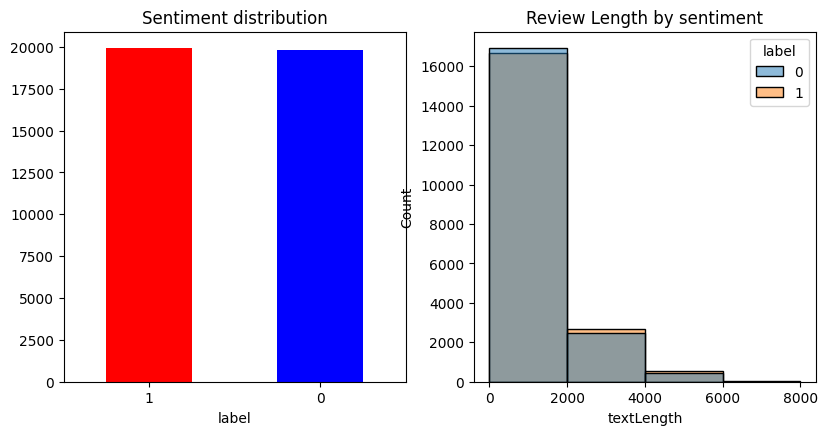

In [ ]:
#1 Sentiment distribution
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
df_clean['label'].value_counts().plot(kind="bar",color=['red','blue'])
plt.title("Sentiment distribution")
plt.xticks(rotation=0)




plt.subplot(2,3,2)
df_clean['textLength']=df_clean['clean_text'].str.len()
sb.histplot(data=df_clean,x='textLength', hue="label",bins=[0,2000,4000,6000,8000])
plt.title('Review Length by sentiment')



In [ ]:
df_clean['clean_text'] = df_clean['tokens'].apply(lambda x: " ".join(x))


df_clean['polarity']=df_clean['clean_text'].apply(lambda x:TextBlob(x).sentiment.polarity)
df_clean['polarity'].head()

0    0.123287
1    0.131345
2   -0.120098
3   -0.135714
4    0.104767
Name: polarity, dtype: float64

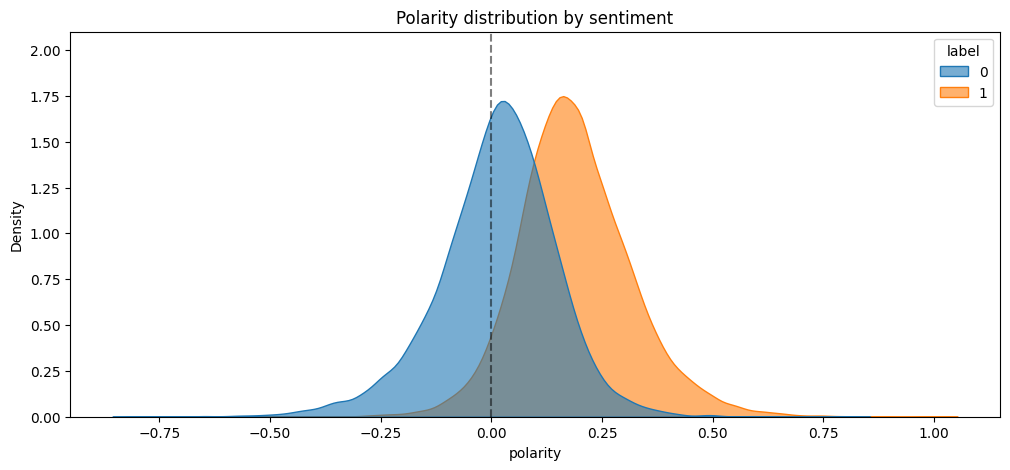

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(1,2)
sb.kdeplot(data=df_clean,x='polarity',hue='label',fill=True,alpha=0.6)
plt.title('Polarity distribution by sentiment')
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)

##The blue distribution was noticeably shifted toward the right, which appears inconsistent with the expected sentiment pattern.


TextBlob vs actual labels
              precision    recall  f1-score   support

    negative       0.89      0.43      0.58     19815
    positive       0.62      0.95      0.75     19908

    accuracy                           0.69     39723
   macro avg       0.76      0.69      0.67     39723
weighted avg       0.76      0.69      0.67     39723



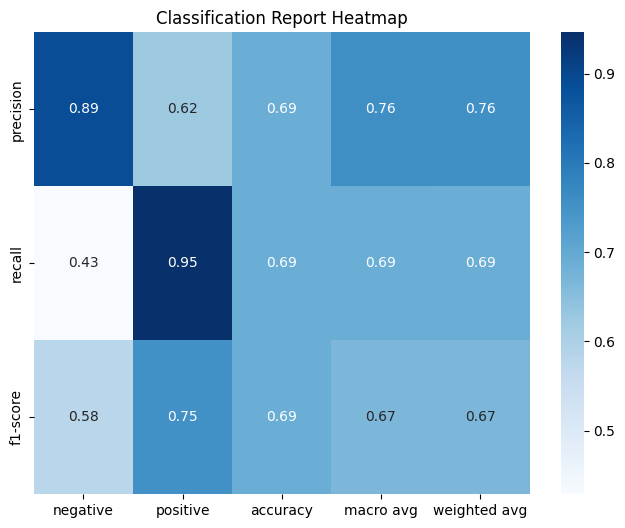

In [ ]:
label_mapping = {0: 'negative', 1: 'positive'}
y_true_str = df_clean['label'].map(label_mapping)


df_clean['textblobprediction'] = df_clean['polarity'].apply(lambda x: 'positive' if x > 0 else 'negative')


print('TextBlob vs actual labels')
print(classification_report(y_true_str, df_clean['textblobprediction']))

report_dict = classification_report(
    y_true_str,
    df_clean['textblobprediction'],
    output_dict=True
)

report_df=pd.DataFrame(report_dict)

plt.figure(figsize=(8,6))
sb.heatmap(report_df.iloc[:-1, ], annot=True, cmap="Blues")
plt.title("Classification Report Heatmap")
plt.show()

The classification report shows that TextBlob performs unevenly across the two classes. For the negative class, precision is high (0.89), meaning that when TextBlob predicts negative, it is usually correct. However, recall is low (0.43), indicating that it only identifies 43% of all actual negatives—many negatives are misclassified as positives. Consequently, the F1-score for negatives is moderate at 0.58. For the positive class, precision is lower (0.62), but recall is very high (0.95), showing that TextBlob catches almost all actual positives, though some predicted positives are false. The F1-score for positives is 0.75. Overall, the model achieves 69% accuracy, with a macro average F1-score of 0.67 and a weighted average F1-score of 0.67. This indicates that TextBlob tends to overpredict positives, performing well at detecting positive sentiment but struggling to correctly identify negatives. These patterns are typical for simple polarity-based approaches and highlight that the model is biased toward predicting positive sentiment.

In [ ]:
print(f"Columns: {df_clean.columns.tolist()}")


Columns: ['label', 'clean_text', 'tokens', 'textLength', 'polarity', 'textblobprediction']


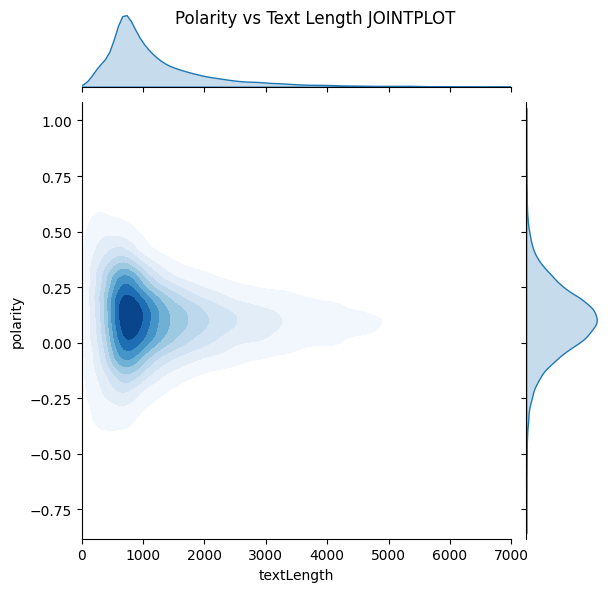

In [ ]:

sb.jointplot(data=df_clean, x='textLength', y='polarity', fill=True, cmap='Blues', kind='kde')
plt.xlim(0, 7000)
plt.suptitle("Polarity vs Text Length JOINTPLOT")
plt.show()

The joint density plot shows how text length and polarity are distributed together. Most texts cluster around 1,000 characters with slightly positive polarity (0–0.25), which is why the plot is darkest there. As you move toward longer texts or more extreme polarity values, the density fades, indicating these are less common. This plot gives an intuitive view of where most data points lie and helps explain why some polarity-based predictions may succeed or fail.

In [ ]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


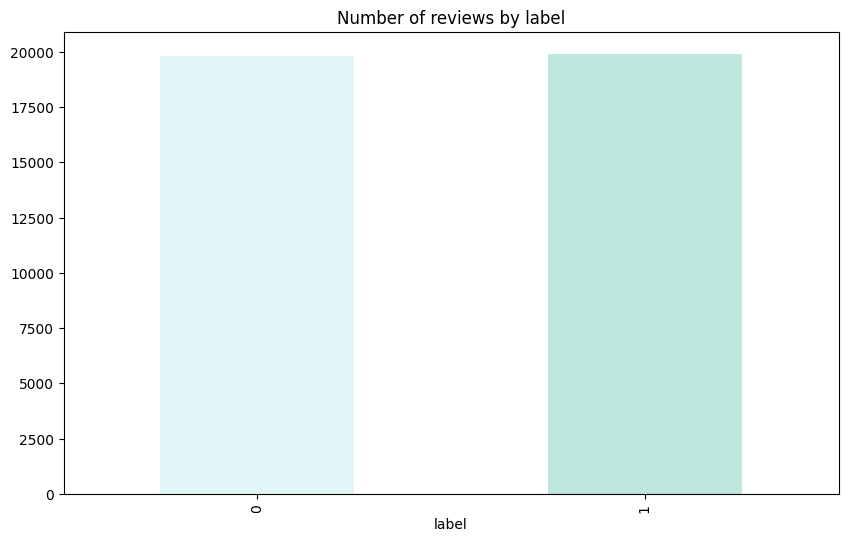

100%|██████████| 39723/39723 [01:21<00:00, 488.49it/s]


     neg    neu    pos  compound  label  \
0  0.085  0.775  0.139    0.6720      0   
1  0.097  0.737  0.165    0.9683      0   
2  0.154  0.810  0.036   -0.9763      0   
3  0.204  0.656  0.140   -0.7515      0   
4  0.060  0.843  0.096    0.7543      1   

                                          clean_text  \
0  i grew up b watching and loving the thunderbir...   
1  when i put this movie in my dvd player and sat...   
2  why do people who do not know what a particula...   
3  even though i have great interest in biblical ...   
4  im a die hard dad army fan and nothing will ev...   

                                              tokens  textLength  polarity  \
0  [i, grew, up, b, watching, and, loving, the, t...         844  0.123287   
1  [when, i, put, this, movie, in, my, dvd, playe...        1736  0.131345   
2  [why, do, people, who, do, not, know, what, a,...         955 -0.120098   
3  [even, though, i, have, great, interest, in, b...         344 -0.135714   
4  [im, a, die

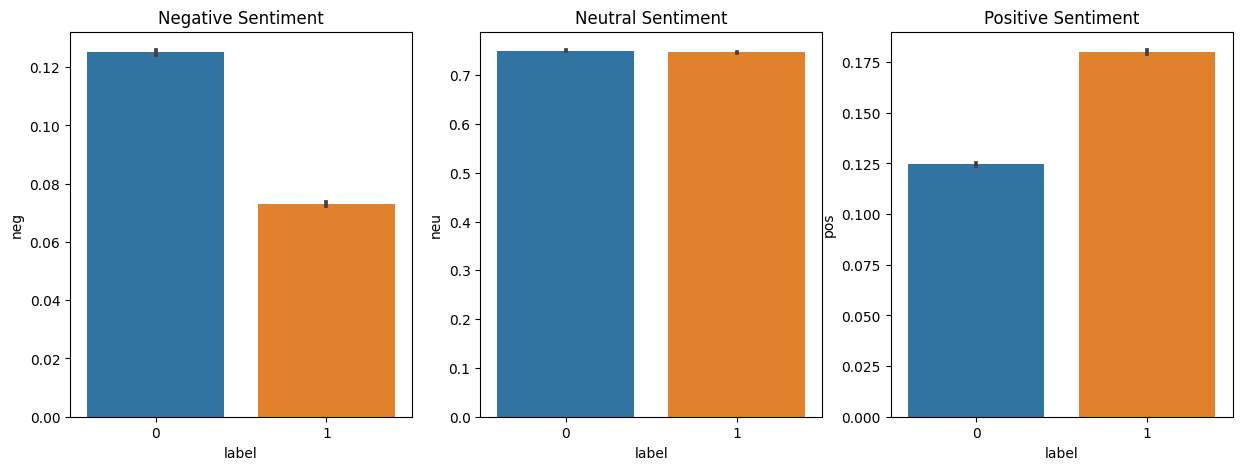

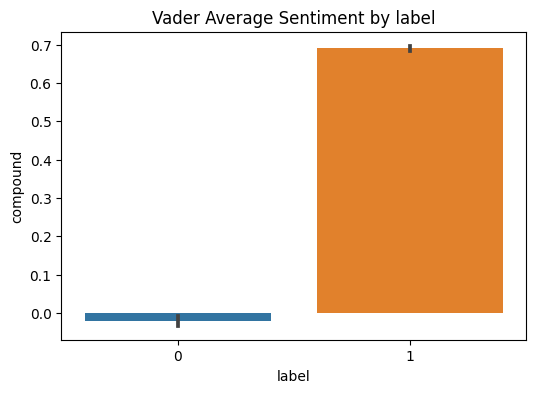

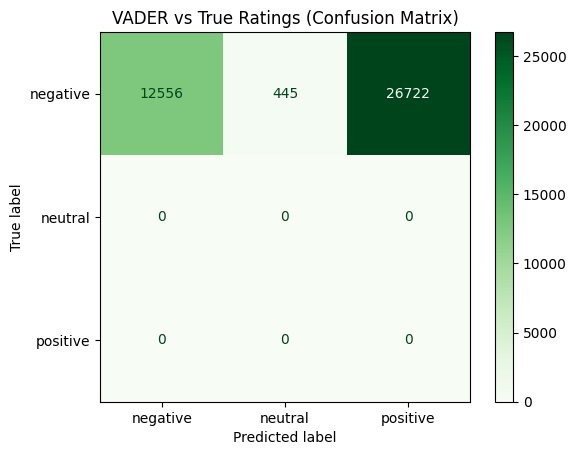

In [ ]:
ax=df_clean['label'].value_counts().sort_index().plot(
    kind='bar',
    title='Number of reviews by label',
    figsize=(10, 6),
    color=sns.color_palette('BuGn'))

ax.set_xlabel('label')
plt.show()

df_clean['id']=df_clean.index




sia=SentimentIntensityAnalyzer()


results={}
for i, row in tqdm(df_clean.iterrows(), total=len(df_clean)):
    clean_text=row['clean_text']
    id=row['id']
    results[id]=sia.polarity_scores(clean_text)

vaders=pd.DataFrame(results).T
vaders=vaders.merge(df_clean, left_index=True, right_on='id')
print(vaders.head())

fig, axs=plt.subplots(1,3, figsize=(15, 5))
sns.barplot(x='label', y='neg', data=vaders, ax=axs[0])
sns.barplot(x='label', y='neu', data=vaders, ax=axs[1])
sns.barplot(x='label', y='pos', data=vaders, ax=axs[2])

axs[0].set_title('Negative Sentiment')
axs[1].set_title('Neutral Sentiment')
axs[2].set_title('Positive Sentiment')

#Display the average compound sentiment for each score

plt.figure(figsize=(6, 4))
sns.barplot(x='label', y='compound', data=vaders)
plt.title('Vader Average Sentiment by label')
plt.show()

def vader_label(compound): #Vader doesnt give a name , it gives a number, we want to map it on our own
    if compound >= 0.05:
        return "positive"
    elif compound <= -0.05:
        return "negative"
    else:
        return "neutral"

vaders["predicted_sentiment"] = vaders["compound"].apply(vader_label)

def map_score_to_sentiment(label):
    if label <= 2:
        return "negative"
    elif label == 3:
        return "neutral"
    else:
        return "positive"

vaders["true_sentiment"] = vaders["label"].apply(map_score_to_sentiment)

cm = confusion_matrix(
    vaders["true_sentiment"],
    vaders["predicted_sentiment"],
    labels=["negative", "neutral", "positive"]
)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["negative", "neutral", "positive"])

disp.plot(cmap="Greens", values_format="d")
plt.title("VADER vs True Ratings (Confusion Matrix)")
plt.show()

In [ ]:



!huggingface-cli download j-hartmann/sentiment-roberta-large-english-3-classes \
    --local-dir ./roberta_local \
    --repo-type model --resume-download

from transformers import AutoTokenizer, AutoModelForSequenceClassification, TextClassificationPipeline
import torch


MODEL_DIR = "./roberta_local"

tokenizer = AutoTokenizer.from_pretrained(MODEL_DIR, local_files_only=True)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_DIR, local_files_only=True)

device = 0 if torch.cuda.is_available() else -1

classifier = TextClassificationPipeline(
    model=model,
    tokenizer=tokenizer,
    device=device,
    return_all_scores=False
)


subset = df_clean.head(10000).copy()

texts = subset['clean_text'].str.slice(0, 500).tolist()

batch_size = 64
sentiments = []

for i in tqdm(range(0, len(texts), batch_size)):
    batch = texts[i:i+batch_size]
    preds = classifier(batch)
    sentiments.extend([p['label'] for p in preds])

subset['sentiment'] = sentiments
subset[['id', 'clean_text', 'sentiment']].head()


bertas = (
    subset.groupby("label")["sentiment"]
          .value_counts(normalize=True)
          .unstack()
          .fillna(0)
)

bertas = bertas[['negative', 'neutral', 'positive']].reset_index()


fig, axs = plt.subplots(1,3, figsize=(12,6))

sns.barplot(x='label', y='negative', data=bertas, ax=axs[0])
sns.barplot(x='label', y='neutral', data=bertas, ax=axs[1])
sns.barplot(x='label', y='positive', data=bertas, ax=axs[2])

axs[0].set_title('Negative Sentiment by Rating')
axs[1].set_title('Neutral Sentiment by Rating')
axs[2].set_title('Positive Sentiment by Rating')

plt.tight_layout()
plt.show()



def map_score_to_sentiment(score):
    if score <= 2:
        return "negative"
    elif score == 3:
        return "neutral"
    else:
        return "positive"

subset["true_sentiment"] = subset["label"].apply(map_score_to_sentiment)



cm = confusion_matrix(
    subset["true_sentiment"],
    subset["sentiment"],
    labels=["negative", "neutral", "positive"]
)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["negative", "neutral", "positive"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix – RoBERTa Sentiment vs True Ratings")
plt.show()


In [ ]:

pattern=r"[a-zA-Z]+"

vect=TfidfVectorizer(
    token_pattern=pattern,
    stop_words='english',
    ngram_range=(1,2),
    max_features=500
)

vect.fit(df_clean["clean_text"])

tokenized_features=vect.transform(df_clean["clean_text"])

features=pd.DataFrame(data=tokenized_features.toarray(),
                     columns=vect.get_feature_names_out()
                     )


X = vect.transform(df_clean["clean_text"])
y = df_clean["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])



Training samples: 31778
Testing samples: 7945


In [ ]:
log_reg = LogisticRegression(max_iter= 1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8286972938955318

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      3991
           1       0.82      0.84      0.83      3954

    accuracy                           0.83      7945
   macro avg       0.83      0.83      0.83      7945
weighted avg       0.83      0.83      0.83      7945



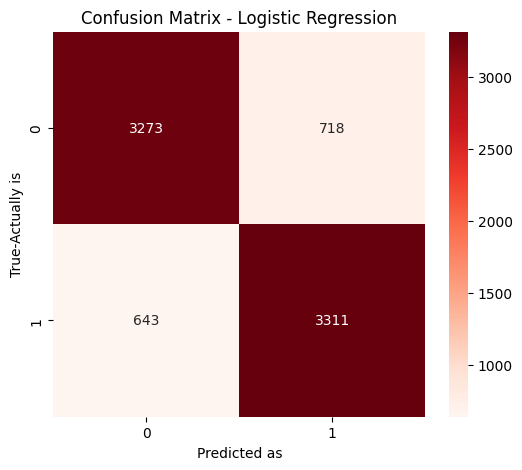

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted as")
plt.ylabel("True-Actually is")
plt.show()

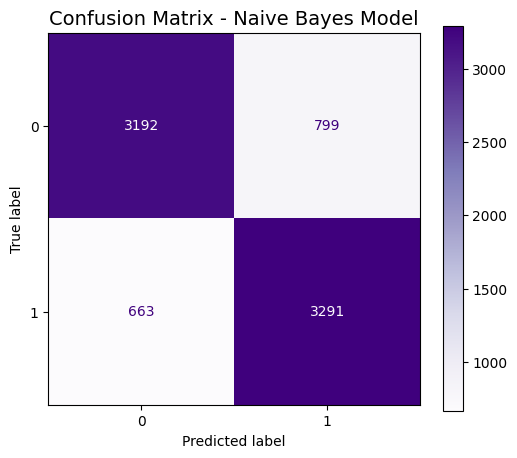

In [ ]:
nb_classifier=MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb =nb_classifier.predict(X_test)

cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(6, 5))
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_classifier.classes_)
disp_nb.plot(cmap='Purples', values_format='d', ax=plt.gca())

plt.title("Confusion Matrix - Naive Bayes Model", fontsize=14)
plt.show()

In [ ]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(df_clean['clean_text'])

word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

print("Vocab size:", vocab_size)

max_len = 200
sequences = tokenizer.texts_to_sequences(df_clean['clean_text'])
X_padded = pad_sequences(sequences, maxlen=max_len, padding="post")

embedding_dim = 100
glove_path = "/kaggle/input/glove6b100dtxt/glove.6B.100d.txt"

embeddings_index = {}

with open(glove_path, encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        embeddings_index[word] = vector

print("Loaded word vectors:", len(embeddings_index))

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, idx in tokenizer.word_index.items():
    vector = embeddings_index.get(word)
    if vector is not None:
        embedding_matrix[idx] = vector


X = X_padded
y = df_clean["label"].values  # 5-class labels: 0,1,2,3,4

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Vocab size: 155447
Loaded word vectors: 400000
Train shape: (31778, 200)
Test shape: (7945, 200)


In [ ]:
model = Sequential([
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=max_len,
        trainable=False
    ),

    Conv1D(256, 5, activation='relu'),
    MaxPooling1D(2),

    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),

    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=6,
    batch_size=128,
    verbose=1
)


Epoch 1/6


I0000 00:00:1765131554.111454     102 service.cc:148] XLA service 0x7f6810006030 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765131554.111968     102 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1765131554.111989     102 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1765131554.416485     102 cuda_dnn.cc:529] Loaded cuDNN version 90300


 18/224 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4915 - loss: 0.8303

I0000 00:00:1765131559.528846     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


224/224 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.5529 - loss: 0.6952 - val_accuracy: 0.7955 - val_loss: 0.4452
Epoch 2/6
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7946 - loss: 0.4489 - val_accuracy: 0.8247 - val_loss: 0.3920
Epoch 3/6
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8382 - loss: 0.3725 - val_accuracy: 0.8238 - val_loss: 0.3789
Epoch 4/6
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8626 - loss: 0.3254 - val_accuracy: 0.8524 - val_loss: 0.3523
Epoch 5/6
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8771 - loss: 0.2941 - val_accuracy: 0.8379 - val_loss: 0.3766
Epoch 6/6
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8903 - loss: 0.2626 - val_accuracy: 0.8471 - val_loss: 0.3600


249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      3963
           1       0.86      0.86      0.86      3982

    accuracy                           0.86      7945
   macro avg       0.86      0.86      0.86      7945
weighted avg       0.86      0.86      0.86      7945



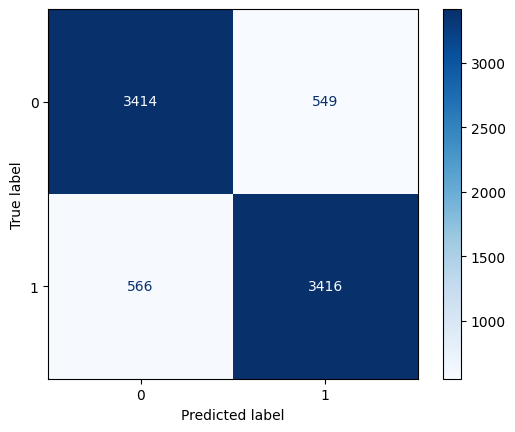

In [ ]:
y_pred_probs = model.predict(X_test).ravel()

y_pred = (y_pred_probs >= 0.5).astype(int)

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Blues")
plt.show()